In [41]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import confusion_matrix_pretty_print
from confusion_matrix_pretty_print import plot_confusion_matrix_from_data

from sklearn.metrics import confusion_matrix,classification_report,precision_score, auc, precision_recall_curve, roc_curve

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Softmax, Dropout
from keras import optimizers
from keras import metrics as kmetr
from keras.utils import plot_model


In [2]:
# data = pd.read_csv('../../saved F(triple_cosineSNF).csv')
# data = data[data['2']!=0]
# data.to_csv('triple_cosineSNF(-1and1).csv',index=False)
dataTrain = pd.read_csv('../../tripleTrain.csv')
dataTest = pd.read_csv('../../tripleTest.csv')

# data.shape

In [3]:
dataTest.head()

,0,1,2,3,4,5,6,7,8,9,...,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140
0,DB00887,DB01410,1,0.001588,0.001749,0.001820,0.001737,0.001703,0.001586,0.001628,...,0.001609,0.001709,0.001597,0.002207,0.001626,0.002411,0.002507,0.002081,0.001636,0.001639
1,DB01267,DB00422,1,0.001720,0.001612,0.001597,0.001582,0.001759,0.001588,0.001635,...,0.001582,0.001633,0.003688,0.001812,0.001694,0.001573,0.001580,0.001600,0.001598,0.001585
2,DB01551,DB01589,1,0.001594,0.001646,0.001723,0.001588,0.001593,0.001592,0.001955,...,0.001898,0.001615,0.001628,0.001561,0.001809,0.001726,0.001792,0.001608,0.001792,0.001720
3,DB01545,DB00611,1,0.001604,0.001596,0.001597,0.001575,0.001595,0.001592,0.001602,...,0.001607,0.002207,0.001708,0.001605,0.001609,0.001579,0.001583,0.001613,0.001608,0.001611
4,DB00530,DB01259,1,0.001663,0.001627,0.001679,0.001664,0.001721,0.001740,0.001687,...,0.001593,0.001625,0.001702,0.001693,0.001610,0.001603,0.001645,0.001656,0.001654,0.001801


In [ ]:

X_test = pd.read_csv('../../triple_cosineSNF(zeros).csv').values[i:j, 3:]

In [4]:
X_train, X_test = dataTrain.values[:,3:], dataTest.values[:,3:]
y_train, y_test = dataTrain.values[:,2].astype(int), dataTest.values[:,2].astype(int)

In [5]:
trainNum = len(X_train)

In [6]:
testNum = len(X_test)

In [7]:
16*71

1136

In [8]:
#reshape data to fit model
X_train = X_train.reshape(trainNum,16,71,1)
X_test = X_test.reshape(testNum,16,71,1)

In [9]:
# X_train.shape

In [10]:
y_train = y_train + 1
y_test  = y_test + 1
y_train = y_train / 2
y_test  = y_test / 2
# print(y_train[0], y_test[0])

In [11]:
y_train

array([0., 0., 0., ..., 1., 1., 1.])

In [12]:

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# y_test[0]

In [13]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [18]:


#create model
model = Sequential()
#add model layers
# kernel_initializer='uniform',
# kernel_initializer='uniform',
# kernel_initializer='uniform',
# kernel_initializer='uniform',
model.add(Conv2D(128, kernel_size=4, activation='relu', input_shape=(16,71,1)))
# model.add(Conv2D(64, kernel_size=2, activation='relu'))

model.add(Conv2D(32, kernel_size=4, activation='relu'))
# model.add(Conv2D(16, kernel_size=2, activation='relu'))
model.add(Conv2D(8, kernel_size=4, activation='relu'))
model.add(Flatten())
model.add(Dense( 64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense( 16, activation='relu'))
model.add(Dense( 2, activation='sigmoid'))
# model.add(Softmax(128))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 13, 68, 128)       2176      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 65, 32)        65568     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 62, 8)          4104      
_________________________________________________________________
flatten_2 (Flatten)          (None, 3472)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                222272    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                1040      
__________

In [19]:
#compile model using accuracy to measure model performance


adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
# model.compile(loss='hinge', optimizer=adam, metrics=[kmetr.categorical_accuracy])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) ## Minist

In [20]:


plot_model(model,show_shapes = True, to_file='model_without softmax.png')

In [21]:
# ###Load the model's saved weights.
# model.load_weights('cnn.h5')

###train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 38400 samples, validate on 4302 samples
Epoch 1/10
38400/38400 [==============================] - 391s 10ms/step - loss: 0.4068 - acc: 0.8265 - val_loss: 0.2966 - val_acc: 0.8691
Epoch 2/10
38400/38400 [==============================] - 413s 11ms/step - loss: 0.2582 - acc: 0.8887 - val_loss: 0.2132 - val_acc: 0.9086
Epoch 3/10
38400/38400 [==============================] - 416s 11ms/step - loss: 0.1788 - acc: 0.9249 - val_loss: 0.1846 - val_acc: 0.9249
Epoch 4/10
38400/38400 [==============================] - 391s 10ms/step - loss: 0.1306 - acc: 0.9461 - val_loss: 0.1573 - val_acc: 0.9391
Epoch 5/10
38400/38400 [==============================] - 390s 10ms/step - loss: 0.0916 - acc: 0.9605 - val_loss: 0.1659 - val_acc: 0.9498
Epoch 6/10
38400/38400 [==============================] - 389s 10ms/step - loss: 0.0740 - acc: 0.9666 - val_loss: 0.1549 - val_acc: 0.9521
Epoch 7/10
38400/38400 [==============================] - 389s 10ms/step - loss: 0.0593 - acc: 0.9720 - val_loss: 0.1

In [25]:
# Saveing the Model
model.save_weights('cnn_without softmax.h5')


In [26]:
#predict first 4 images in the test set
predit = model.predict(X_test)
predit

array([[2.8397501e-05, 9.9836057e-01],
       [9.6950553e-02, 1.7200343e-02],
       [1.0175101e-08, 9.9999988e-01],
       ...,
       [3.8921949e-06, 9.9998569e-01],
       [7.1225824e-11, 1.0000000e+00],
       [2.6920674e-10, 9.9917608e-01]], dtype=float32)

In [27]:
#actual results for first 4 images in test set
print(predit[:4])
predit[:4]


[[2.8397501e-05 9.9836057e-01]
 [9.6950553e-02 1.7200343e-02]
 [1.0175101e-08 9.9999988e-01]
 [1.3943220e-06 1.0000000e+00]]


array([[2.8397501e-05, 9.9836057e-01],
       [9.6950553e-02, 1.7200343e-02],
       [1.0175101e-08, 9.9999988e-01],
       [1.3943220e-06, 1.0000000e+00]], dtype=float32)

In [28]:
#from sklearn.metrics import precision_recall_curve, roc_curve

prec, rec, thr = precision_recall_curve(y_test[:,0], predit[:,0])
aupr_val = auc(rec, prec)
fpr, tpr, thr = roc_curve(y_test[:,0], predit[:,0])
auc_val = auc(fpr, tpr)
print(aupr_val,auc_val)

0.7480010347905607 0.936084391235368


In [29]:
# model.history.history['val_acc']

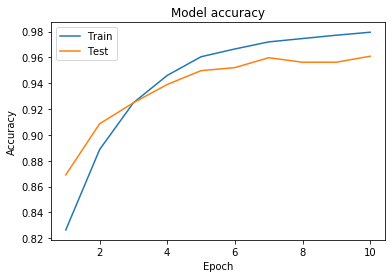

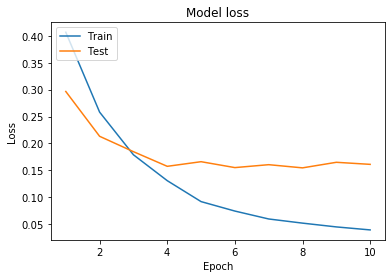

In [31]:

# Plot training & validation accuracy values
plt.plot(list(range(1,11)),model.history.history['acc'])
plt.plot(list(range(1,11)),model.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(list(range(1,11)),model.history.history['loss'])
plt.plot(list(range(1,11)),model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [32]:
# predit
predit[:,0].shape 

(4302,)

In [33]:
predicts = []
for a,b in predit:
    if a >=b:
        predicts.append(0)
    else:
        predicts.append(1)

In [34]:
predicts = []
for a,b in predit:
    if a >=0.8:
        predicts.append(0)
    elif b>=0.8:
        predicts.append(2)
    else:
        predicts.append(1)

In [35]:

cm = confusion_matrix(list(predicts), list((dataTest.values[:,2]+1)))
print(cm)

CR = classification_report(list((dataTest.values[:,2]+1)),list(predicts))
print(CR)
print(145/4702)
# i=0
# for j in list(data.values[9500:,2]+1):
#     if j==1:
#         i +=1
# print(i)

# plt.show()
plot_confusion_matrix_from_data(list((dataTest.values[:,2]+1)), list(predicts))


[[  50    0    6]
 [ 822    0  483]
 [  52    0 2889]]


c:\program files\python36\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.89      0.05      0.10       924
           1       0.00      0.00      0.00         0
           2       0.98      0.86      0.91      3378

    accuracy                           0.68      4302
   macro avg       0.63      0.30      0.34      4302
weighted avg       0.96      0.68      0.74      4302

0.030837941301573798


ValueError: Shape of passed values is (3, 3), indices imply (2, 2)

In [36]:
pd.DataFrame(predit)

,0,1
0,2.839750e-05,0.998361
1,9.695055e-02,0.017200
2,1.017510e-08,1.000000
3,1.394322e-06,1.000000
4,1.197421e-02,0.000157
...,...,...
4297,2.703674e-01,0.000063
4298,2.494207e-07,0.864274
4299,3.892195e-06,0.999986
4300,7.122582e-11,1.000000


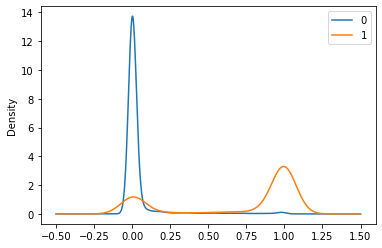

In [42]:
pd.DataFrame(predit).plot.density()


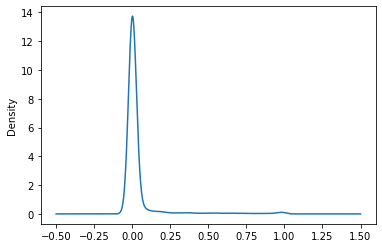

In [43]:
pd.DataFrame(predit).iloc[:,0].plot.density()

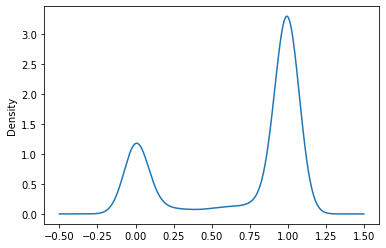

In [44]:
pd.DataFrame(predit).iloc[:,1].plot.density()

Text(0, 0.5, 'frequency distribution')

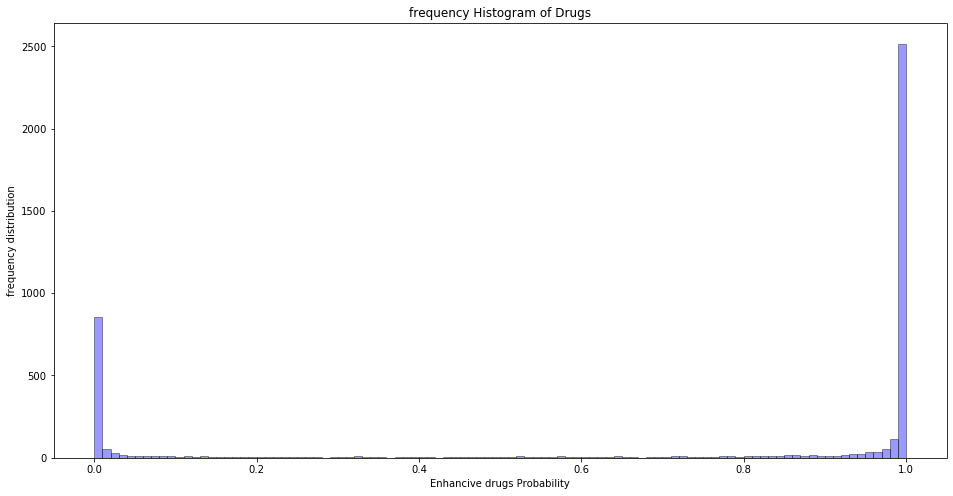

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram
sns.distplot(pd.DataFrame(predit).iloc[:,1], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})

# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('Enhancive drugs Probability')
plt.ylabel('frequency distribution')


Text(0, 0.5, 'frequency distribution')

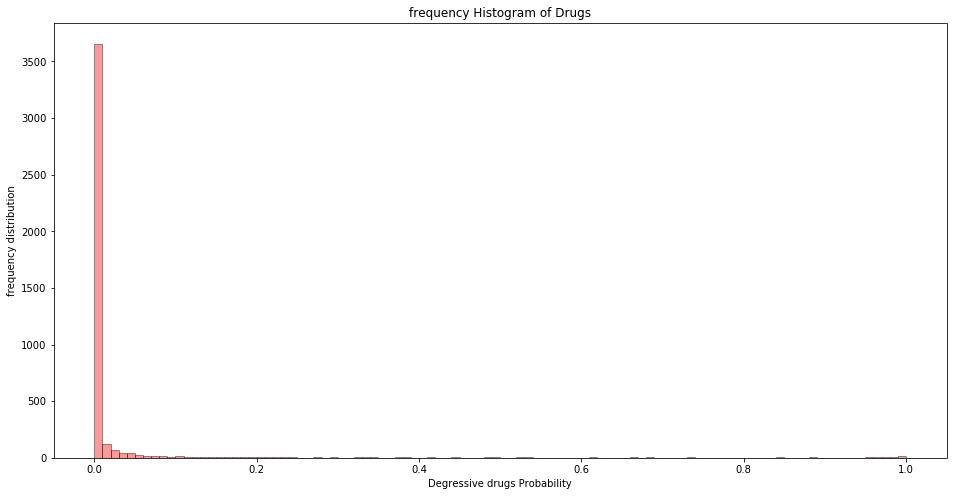

In [46]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram

sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})
# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('Degressive drugs Probability')
plt.ylabel('frequency distribution')

Text(0, 0.5, 'frequency distribution')

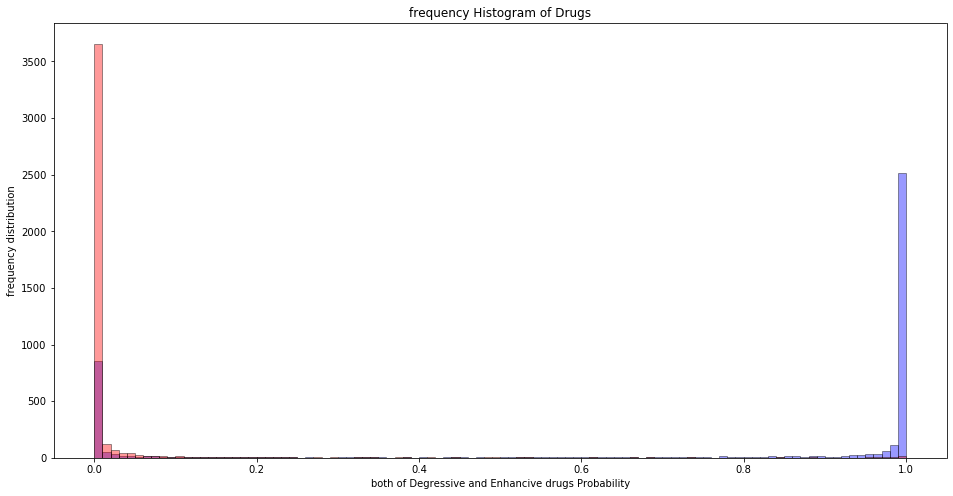

In [47]:

fig, ax = plt.subplots()
fig.set_size_inches(16,8)

# matplotlib histogram
# plt.hist(pd.DataFrame(predit).iloc[:,1], color = 'blue', edgecolor = 'black',
#          bins = int(200))

# seaborn histogram
sns.distplot(pd.DataFrame(predit).iloc[:,1], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})

sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=False, 
             bins=int(100), color = 'red',
             hist_kws={'edgecolor':'black'})
# sns.distplot(pd.DataFrame(predit).iloc[:,0], hist=True, kde=True, 
#              bins=int(200), color = 'darkblue', 
#              hist_kws={'edgecolor':'black'},
#              kde_kws={'linewidth': 4})
# Add labels
plt.title('frequency Histogram of Drugs')
plt.xlabel('both of Degressive and Enhancive drugs Probability')
plt.ylabel('frequency distribution')